## Data Integration and Reshaping

#### Author: Akshatha Shivashankar Chindalur

Version: 1.0

Environment: Python 3.7.3 and Jupyter notebook

Libraries used: 

* pandas (for accessing and modifying data in csv files, included in Anaconda Python 3.7) 
* shapefile (for parsing shapefiles that contain geographic data, included in Anaconda Python 3.7) 
* numpy (for solving simultaneous equations, included in Anaconda Python 3.7) 
* sklearn (for building linear models and reshaping raw data, included in Anaconda Python 3.7)
* datetime (for manipulating date and time related data, included in Anaconda Python 3.7)

Importing the required libraries for data integration and reshaping tasks.

In [1]:
# loading the necessary libraries

import pandas as pd
from datetime import datetime
from datetime import timedelta
import shapefile
import collections
import numpy as np
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from math import radians, cos, sin, asin, sqrt
import xml.etree.ElementTree as et
import requests
import lxml.html as lh
import re
from bs4 import BeautifulSoup
import seaborn as sns
from sklearn.linear_model import LinearRegression # To develop a linear model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import math
from sklearn import preprocessing # To work with transformations

## Data Integration

Datasets from several sources and formats are integrated into a single schema.

The property dataset is loaded and is checked for duplicate and null records.

In [2]:
# reading the property dataset
prop_df = pd.read_csv("./property.csv")
prop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
ID            720 non-null object
Address       720 non-null object
Rooms         720 non-null int64
Type          720 non-null object
Price         720 non-null float64
Date          720 non-null object
Bathroom      720 non-null float64
Car           720 non-null float64
Landsize      720 non-null float64
Age           720 non-null float64
Lattitude     720 non-null float64
Longtitude    720 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 67.6+ KB


In [3]:
prop_df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
0,ID484886706,4/31 Millers Rd,2,u,391000.0,11/02/2017,1.0,1.0,0.0,54.0,-37.86780,144.83840
1,ID838725947,309/416 Gore St,2,u,790000.0,22/08/2016,1.0,1.0,0.0,19.0,-37.79670,144.98360
2,ID939083675,9A Comas Rd,3,h,1150000.0,23/09/2017,2.0,2.0,335.0,23.0,-37.97316,145.04042
3,ID655067319,5 Napier St,4,h,2025000.0,12/08/2017,2.0,2.0,408.0,9.0,-37.98707,145.06090
4,ID798344598,6 Munro St,3,h,1435000.0,8/04/2017,1.0,1.0,450.0,99.0,-37.77560,144.91480


The dataset is checked for null records.

In [4]:
prop_df[prop_df['ID'].isnull()]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude


There are no null records in the dataset.

Next, the dataset is checked for duplicate records.

In [5]:
prop_df[prop_df.duplicated(['ID'], keep=False)]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
9,ID220001637,1/1 Nangana Rd,2,u,602000.0,3/06/2017,1.0,1.0,1166.0,18.0,-37.88674,145.07234
20,ID286337620,11 Rebecca Cl,5,h,835500.0,29/07/2017,5.0,4.0,570.0,29.0,-38.03335,145.13212
31,ID596349914,50 Ruby St,3,h,1110000.0,28/05/2016,2.0,2.0,470.0,51.0,-37.75220,144.88300
43,ID412638060,3 Raymond Ct,4,t,1100000.0,10/09/2016,3.0,2.0,302.0,47.0,-37.93170,145.02940
95,ID627022240,98 Heath St,2,h,1400000.0,25/02/2017,1.0,1.0,168.0,85.0,-37.83460,144.94530
100,ID256409352,27 Hurtle St,3,h,1500000.0,3/06/2017,3.0,1.0,382.0,11.0,-37.77206,144.90397
122,ID687265915,2/5 Mines Rd,2,u,609000.0,27/05/2017,1.0,2.0,190.0,49.0,-37.80551,145.24589
129,ID504350825,91 Market Rd,3,h,472000.0,3/06/2017,1.0,0.0,700.0,69.0,-37.89363,144.65693
139,ID908100497,33 Disraeli St,3,h,1440000.0,27/11/2016,1.0,1.0,298.0,119.0,-37.80210,145.03910
140,ID684017785,14/181 Power St,2,u,525000.0,17/06/2017,1.0,1.0,0.0,49.0,-37.82700,145.02563


In [6]:
prop_df.loc[prop_df['ID'] == 'ID220001637']

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
9,ID220001637,1/1 Nangana Rd,2,u,602000.0,3/06/2017,1.0,1.0,1166.0,18.0,-37.88674,145.07234
711,ID220001637,1/1 Nangana Rd,2,u,602000.0,3/06/2017,1.0,1.0,1166.0,18.0,-37.88674,145.07234


As it can be seen, there is more than one record with the same ID. Thus, only a single copy of such records are retained.

In [7]:
# duplicate records are droppe
prop_df.drop_duplicates(keep='first', inplace = True)

### Columns 1 and 2: ID and Address

These attributes are extracted from the initial given property dataset.

In [8]:
# creating a new dataframe by obtaining attributes ID and Address from the property dataset
integrated_df = pd.DataFrame(prop_df[['ID','Address']], columns=['ID', 'Address'])
integrated_df.head()

,ID,Address
0,ID484886706,4/31 Millers Rd
1,ID838725947,309/416 Gore St
2,ID939083675,9A Comas Rd
3,ID655067319,5 Napier St
4,ID798344598,6 Munro St


### Column 3: Suburb

This attribute is derived from the shape file of Victorian suburb boundary.

In [9]:
# loading the shape file
suburb_sf = shapefile.Reader("./vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp")

#converting the records with the dataset to list of lists
suburb_recs = [sub[:] for sub in suburb_sf.records()]
suburb_shapes = suburb_sf.shapes()
suburb_recs

[['6670',
  datetime.date(2011, 8, 31),
  None,
  'VIC2615',
  datetime.date(2012, 4, 27),
  None,
  'UNDERBOOL',
  '',
  '',
  'G',
  None,
  '2'],
 ['6671',
  datetime.date(2011, 8, 31),
  None,
  'VIC1986',
  datetime.date(2012, 4, 27),
  None,
  'NURRAN',
  '',
  '',
  'G',
  None,
  '2'],
 ['6672',
  datetime.date(2011, 8, 31),
  None,
  'VIC2862',
  datetime.date(2012, 4, 27),
  None,
  'WOORNDOO',
  '',
  '',
  'G',
  None,
  '2'],
 ['6673',
  datetime.date(2011, 8, 31),
  None,
  'VIC734',
  datetime.date(2017, 8, 9),
  None,
  'DEPTFORD',
  '',
  '',
  'G',
  None,
  '2'],
 ['6674',
  datetime.date(2011, 8, 31),
  None,
  'VIC2900',
  datetime.date(2012, 4, 27),
  None,
  'YANAC',
  '',
  '',
  'G',
  None,
  '2'],
 ['6405',
  datetime.date(2011, 8, 31),
  None,
  'VIC1688',
  datetime.date(2012, 4, 27),
  None,
  'MINIMAY',
  '',
  '',
  'G',
  None,
  '2'],
 ['6451',
  datetime.date(2011, 8, 31),
  None,
  'VIC999',
  datetime.date(2012, 4, 27),
  None,
  'GLEN FORBES',
  ''

In [10]:
len(suburb_recs), len(suburb_shapes)

(2973, 2973)

Using **shapely** library, the polygonal shape of each suburb is computed from its respective boundaries in the shape file.

In [11]:
#https://gis.stackexchange.com/questions/57635/updating-attributes-using-pyshp

# the attibute names from the shape file is obtained
suburb_fields = suburb_sf.fields[1:] 
suburb_fields_name = [field[0] for field in suburb_fields]

# from the points int the boundary of the suburb its polygonal shape with points within it is 
# computed.
suburb_polys = [Polygon(s.points) for s in suburb_sf.shapes()]

In [12]:
# a new dataframe is created with the data from the shape file and the computed polygon
suburb_df = pd.DataFrame(suburb_recs, columns = suburb_fields_name)
suburb_df['Polygon'] = suburb_polys
suburb_df.head()

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,VIC_LOCALI,VIC_LOCA_1,VIC_LOCA_2,VIC_LOCA_3,VIC_LOCA_4,VIC_LOCA_5,VIC_LOCA_6,VIC_LOCA_7,Polygon
0,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,,,G,None,2,"POLYGON ((141.74552399 -35.07228701, 141.74552..."
1,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,,,G,None,2,"POLYGON ((148.668767 -37.39571245, 148.6687620..."
2,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,,,G,None,2,"POLYGON ((142.92287999 -37.97885997, 142.90449..."
3,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,,,G,None,2,"POLYGON ((147.82335712 -37.66000897, 147.82312..."
4,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,,,G,None,2,"POLYGON ((141.279783 -35.99858911, 141.2798853..."


In [13]:
#   This function determines the suburb for each property in the dataframe with respect to its 
#   latitude and longitude
#
#   :param long:   the longitude of the property.
#          lat:    the latitude of the property. 
#
#   :return suburb:   the suburb the property is located in (converted to title format).
 
def get_suburb(long, lat):
    
    point = Point(long, lat)
    suburb = 'not available'
    
    for i, each in suburb_df.iterrows():
        if each['Polygon'].contains(point):
            suburb = each['VIC_LOCA_2']
            
    return suburb.title()

In [14]:
# for each property, its respective suburb is computed
suburbs = []
suburbs = prop_df.apply(lambda row: get_suburb(row['Longtitude'], row['Lattitude']),axis=1)
integrated_df['Suburb'] = suburbs
integrated_df.head()

,ID,Address,Suburb
0,ID484886706,4/31 Millers Rd,Altona
1,ID838725947,309/416 Gore St,Fitzroy
2,ID939083675,9A Comas Rd,Beaumaris
3,ID655067319,5 Napier St,Mentone
4,ID798344598,6 Munro St,Ascot Vale


In [15]:
integrated_df[integrated_df['Suburb'].isnull()]

,ID,Address,Suburb


The **Suburb** attribute is now integrated and as checked above there are no null values within this attribute.

### Columns 4, 5, 6, 7, 8, 9, 10, 11, 12, 13 : Price, Type, Date, Rooms, Bathroom, Car, LandSize, Age, Latitude, Longitude

These attributes are obtained from the initially loaded property dataset.

In [16]:
integrated_df['Price'], integrated_df['Type'], integrated_df['Date'], integrated_df['Rooms'], \
integrated_df['Bathroom'], integrated_df['Car'], integrated_df['LandSize'],\
integrated_df['Age'], integrated_df['Latitude'], integrated_df['Longitude'] = [prop_df['Price'], prop_df['Type'], 
                                                                          prop_df['Date'], prop_df['Rooms'],\
                                                                          prop_df['Bathroom'], prop_df['Car'],\
                                                                          prop_df['Landsize'], prop_df['Age'],\
                                                                          prop_df['Lattitude'], prop_df['Longtitude']]

integrated_df.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,Age,Latitude,Longitude
0,ID484886706,4/31 Millers Rd,Altona,391000.0,u,11/02/2017,2,1.0,1.0,0.0,54.0,-37.86780,144.83840
1,ID838725947,309/416 Gore St,Fitzroy,790000.0,u,22/08/2016,2,1.0,1.0,0.0,19.0,-37.79670,144.98360
2,ID939083675,9A Comas Rd,Beaumaris,1150000.0,h,23/09/2017,3,2.0,2.0,335.0,23.0,-37.97316,145.04042
3,ID655067319,5 Napier St,Mentone,2025000.0,h,12/08/2017,4,2.0,2.0,408.0,9.0,-37.98707,145.06090
4,ID798344598,6 Munro St,Ascot Vale,1435000.0,h,8/04/2017,3,1.0,1.0,450.0,99.0,-37.77560,144.91480


### Column 14, 15, 16 : train_station_id, distance_to_train_station, travel_min_to_CBD

For these attributes the datasets in from **gtfs** folder are considered. Here, since the folders 1 and 2 containtin regional and metropolitan train information, only these two folders are considered for further processing.

In order to obtain those trains functioning over weekdays, the data in **calendar.txt** is visualised and accordingly the **service ids** of those trains running on weekdays are obtained. 

In [17]:
# to avoid duplicate or redundant records, outer join is used while merging the files from the two different folders

train_cal_1 = pd.read_csv('./1/google_transit/calendar.txt')
train_cal_2 = pd.read_csv('./2/google_transit/calendar.txt')

train_cal = pd.merge(train_cal_1, train_cal_2, how = 'outer')
train_cal.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,UR,0,0,0,1,0,0,0,20190509,20190509
1,T6,0,0,0,0,1,0,0,20190510,20190510
2,T2,0,0,0,0,0,1,0,20190511,20190511
3,UJ,0,0,0,0,0,0,1,20190512,20190512
4,UO,1,0,0,0,0,0,0,20190513,20190513


Now, only the service ids of trains running from **monday - friday (weekdays)** are obtained.

In [18]:
# extracting service ids of trains running on weekdays

service_ids_weekdays = train_cal[(train_cal['monday'] == 1) & (train_cal['tuesday'] == 1) & \
                                 (train_cal['wednesday'] == 1) & (train_cal['thursday'] == 1) & \
                                (train_cal['friday'] == 1)]
print(service_ids_weekdays)

service_ids_weekdays = service_ids_weekdays['service_id']

   service_id  monday  tuesday  wednesday  thursday  friday  saturday  sunday  \
6          T0       1        1          1         1       1         0       0   
13       T0_1       1        1          1         1       1         0       0   
16       T0_2       1        1          1         1       1         0       0   
20       T0_3       1        1          1         1       1         0       0   
51         T0       1        1          1         1       1         0       0   

    start_date  end_date  
6     20190515  20190523  
13    20190530  20190606  
16    20190607  20190628  
20    20190629  20190810  
51    20190524  20190810  


Thus, **T0, T0_1, T0_2, T0_3** are the trains that function on **Weekdays**. Thus, only such trips are identified fron **trips.txt**

In [19]:
train_trip_1 = pd.read_csv('./1/google_transit/trips.txt')
train_trip_2 = pd.read_csv('./2/google_transit/trips.txt')
train_trip = pd.merge(train_trip_1, train_trip_2, how = 'outer')
train_trip.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0
1,1-V08-G-mjp-1,T0,1052.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
2,1-V08-G-mjp-1,T0,1053.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
3,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1
4,1-V08-G-mjp-1,T0,1523.T0.1-V08-G-mjp-1.5.R,1-V08-G-mjp-1.5.R,Bairnsdale,1


In [20]:
# extract trips that run on weekdays only
weekday_trips = train_trip[(train_trip['service_id'].isin(set(service_ids_weekdays)))]
print(weekday_trips.head())

weekday_trips = weekday_trips['trip_id']

        route_id service_id                    trip_id           shape_id  \
0  1-V08-G-mjp-1         T0  1051.T0.1-V08-G-mjp-1.1.H  1-V08-G-mjp-1.1.H   
1  1-V08-G-mjp-1         T0  1052.T0.1-V08-G-mjp-1.2.H  1-V08-G-mjp-1.2.H   
2  1-V08-G-mjp-1         T0  1053.T0.1-V08-G-mjp-1.2.H  1-V08-G-mjp-1.2.H   
3  1-V08-G-mjp-1         T0  1522.T0.1-V08-G-mjp-1.4.R  1-V08-G-mjp-1.4.R   
4  1-V08-G-mjp-1         T0  1523.T0.1-V08-G-mjp-1.5.R  1-V08-G-mjp-1.5.R   

  trip_headsign  direction_id  
0     Melbourne             0  
1     Melbourne             0  
2     Melbourne             0  
3    Bairnsdale             1  
4    Bairnsdale             1  


Now, that we have all the trips travelling on weekdays, we next need to identify those trains that have direct trips to **Southern Cross Railway Station**. For this, we extract the **stop_ids** for **Southern Cross Railway Station** from **stops.txt**

In [21]:
# in order to avoid redundant and duplicate records oter join is used.
train_stops_1 = pd.read_csv('./1/google_transit/stops.txt')
train_stops_2 = pd.read_csv('./2/google_transit/stops.txt')
train_stops = pd.merge(train_stops_1, train_stops_2, how = 'outer')
train_stops.head()

,stop_id,stop_name,stop_lat,stop_lon
0,17204,Wallan Railway Station (Wallan),-37.416861,145.005372
1,19980,Melton Railway Station (Melton South),-37.703293,144.572524
2,19981,Rockbank Railway Station (Rockbank),-37.729261,144.650631
3,19982,Deer Park Railway Station (Deer Park),-37.777764,144.772304
4,19998,Sunbury Railway Station (Sunbury),-37.579206,144.728165


In [22]:
# obtaining the stop ids of Southern Cross Railway Station
southern_cross_ids = train_stops[(train_stops['stop_name'] == "Southern Cross Railway Station (Melbourne City)")]\
                                ['stop_id']
#southern_cross_ids = southern_cross_ids.tolist()
type(southern_cross_ids)

pandas.core.series.Series

In [23]:
# similar to above, outer join is used to avoid duplicate or redundant records.
train_stop_times_1 = pd.read_csv('./1/google_transit/stop_times.txt')
train_stop_times_2 = pd.read_csv('./2/google_transit/stop_times.txt')
train_stop_times = pd.merge(train_stop_times_1, train_stop_times_2, how = 'outer')
train_stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,7548.UR.1-V08-A-mjp-1.1.H,06:08:00,06:08:00,20291,1,NaN,0,0,0.000000
1,7548.UR.1-V08-A-mjp-1.1.H,06:42:00,06:42:00,20346,2,NaN,0,0,52720.840026
2,7548.UR.1-V08-A-mjp-1.1.H,06:55:00,06:57:00,20341,3,NaN,0,0,68786.649688
3,7548.UR.1-V08-A-mjp-1.1.H,07:16:00,07:16:00,20339,4,NaN,0,0,94514.728171
4,7548.UR.1-V08-A-mjp-1.1.H,07:32:00,07:34:00,20351,5,NaN,0,0,116895.210301


From the above trips, all the trips that travel on weekdays and go to **Southern Cross Railway Station** are identified.

In [24]:
weekday_trips_SC = train_stop_times[(train_stop_times['trip_id'].isin(set(weekday_trips))) & \
                                   (train_stop_times['stop_id'].isin(southern_cross_ids))]['trip_id']
weekday_trips_SC.head()

593    1051.T0.1-V08-G-mjp-1.1.H
688    1052.T0.1-V08-G-mjp-1.2.H
703    1053.T0.1-V08-G-mjp-1.2.H
725    1522.T0.1-V08-G-mjp-1.4.R
740    1523.T0.1-V08-G-mjp-1.5.R
Name: trip_id, dtype: object

In [25]:
# a dataframe of all the trips travelling to Southern Cross Station on weekdays

trains_weekday_SC = train_stop_times[(train_stop_times['trip_id'].isin(set(weekday_trips_SC)))]
trains_weekday_SC.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
578,1051.T0.1-V08-G-mjp-1.1.H,06:08:00,06:08:00,20291,1,NaN,0,0,0.000000
579,1051.T0.1-V08-G-mjp-1.1.H,06:42:00,06:42:00,20346,2,NaN,0,0,52720.840026
580,1051.T0.1-V08-G-mjp-1.1.H,06:55:00,06:57:00,20341,3,NaN,0,0,68786.649688
581,1051.T0.1-V08-G-mjp-1.1.H,07:16:00,07:16:00,20339,4,NaN,0,0,94514.728171
582,1051.T0.1-V08-G-mjp-1.1.H,07:32:00,07:34:00,20351,5,NaN,0,0,116895.210301


For stations with regional and metropolitan trains, we identify the the number of stops travelled to reach **Southern Cross Station** using the **stop_sequence**. The minimum of this is used for computing the distance and minutes travelled to **Southern Cross Stations**

In [26]:
#   This function determines the which trip is closest Southern Cross from a station which
#   is obtained from stop_sequence.
#
#   :param trip:   the trip_id of a particular record.
#
#   :return stop_seq1/stop_seq2:   the sequence number of where Southern Cross appears in a 
#                                  particular trip

def get_stop_seq(trip):
        
        stop_seq1 = trains_weekday_SC[(trains_weekday_SC['trip_id'] == trip) & \
                                      (trains_weekday_SC['stop_id'] == southern_cross_ids.iloc[0])]['stop_sequence']
        
        stop_seq2 = trains_weekday_SC[(trains_weekday_SC['trip_id'] == trip) & \
                                      (trains_weekday_SC['stop_id'] == southern_cross_ids.iloc[1])]['stop_sequence']
        
        if (not stop_seq1.empty) and (not stop_seq2.empty):
            return min(int(stop_seq1), (stop_seq2))
        elif stop_seq1.empty:
            return int(stop_seq2)
        elif stop_seq2.empty:
            return int(stop_seq1)

In [27]:
# a new column that stores the sequence number of Southern Cross for a particular trip
trains_weekday_SC['SC_stop_seq'] = trains_weekday_SC['trip_id'].apply(get_stop_seq)

trains_weekday_SC.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,SC_stop_seq
578,1051.T0.1-V08-G-mjp-1.1.H,06:08:00,06:08:00,20291,1,NaN,0,0,0.000000,23
579,1051.T0.1-V08-G-mjp-1.1.H,06:42:00,06:42:00,20346,2,NaN,0,0,52720.840026,23
580,1051.T0.1-V08-G-mjp-1.1.H,06:55:00,06:57:00,20341,3,NaN,0,0,68786.649688,23
581,1051.T0.1-V08-G-mjp-1.1.H,07:16:00,07:16:00,20339,4,NaN,0,0,94514.728171,23
582,1051.T0.1-V08-G-mjp-1.1.H,07:32:00,07:34:00,20351,5,NaN,0,0,116895.210301,23


Now we obtain all the trains that depart between 7 - 9:30am  to Southern Cross Station

In [28]:
trains_dep_SC = trains_weekday_SC[(trains_weekday_SC['departure_time'] > "07:00:00") & \
                                  (trains_weekday_SC['departure_time'] < "09:30:00") & \
                                  (trains_weekday_SC['stop_sequence'] < trains_weekday_SC['SC_stop_seq'])]

# stop ids of stations that have trains to Southern Cross
stop_ids_to_SC = trains_dep_SC['stop_id']

Now, we obtain the these filtered stations from **stop.txt** files as they store the latitude, longitute for each of these stations.

In [29]:
stop_to_SC = train_stops[train_stops['stop_id'].isin(set(stop_ids_to_SC))]

# adding the records corresponding to southern cross station as well into this
stop_to_SC = pd.merge(stop_to_SC, train_stops[(train_stops['stop_id']== southern_cross_ids.iloc[0])\
                                              |(train_stops['stop_id']== southern_cross_ids.iloc[1])], how = 'outer')
stop_to_SC.head()

,stop_id,stop_name,stop_lat,stop_lon
0,17204,Wallan Railway Station (Wallan),-37.416861,145.005372
1,19980,Melton Railway Station (Melton South),-37.703293,144.572524
2,19981,Rockbank Railway Station (Rockbank),-37.729261,144.650631
3,19982,Deer Park Railway Station (Deer Park),-37.777764,144.772304
4,19998,Sunbury Railway Station (Sunbury),-37.579206,144.728165


In [30]:
#https://stackoverflow.com/questions/45127141/find-the-nearest-point-in-distance-for-all-the-points-in-the-dataset-python

#   This function computes the distance between a pair of latitude and longitude values. 
#
#   :param lat1:   the latitude of point 1.
#         long1:   the longitude of point 1.
#          lat2:   the latitude of point 2.
#         long2:   the longitude of point 2.
#
#   :return meters:   the distance between the two points in meters.

def get_distance(lat1, long1, lat2, long2):
    
    R = 6378
    
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2.0)**2 + cos(lat1) * cos(lat2) * sin(dlon/2.0)**2
    c = 2 * asin(sqrt(a)) 
    meters = R * c * 1000
    
    return meters

In [31]:
#   This function computes the nearest point to a given point based on the distance. 
#
#   :param prop_lat:   the latitude of a given property.
#         prop_lon:   the longitude of a given property.
#
#   :return [station_id, min_dist]:   a tuple of the nearest station id and the corresponding 
#                                     distance from a given property.

def get_nearest(prop_lat, prop_lon):
        
        station_id = -1
        min_dist = -1
        dist = np.array([])
        
        for i, each in stop_to_SC.iterrows():
            
            dist = np.append(dist, get_distance(prop_lat, prop_lon, each['stop_lat'], each['stop_lon']))
        
            idx = np.argmin(dist)
            min_dist = np.min(dist)
            station_id = stop_to_SC.iloc[idx]['stop_id']
        
        return [station_id, min_dist]

In [32]:
# creating an empty list
station = []

station.append(integrated_df.apply(lambda row:get_nearest(row['Latitude'], row['Longitude']), axis=1))
station = np.array(station)

In [33]:
integrated_df['train_station_id'], integrated_df['distance_to_train_station'] = [station[0,:,0], station[0, :, 1]]
integrated_df.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,Age,Latitude,Longitude,train_station_id,distance_to_train_station
0,ID484886706,4/31 Millers Rd,Altona,391000.0,u,11/02/2017,2,1.0,1.0,0.0,54.0,-37.86780,144.83840,19927,224.815
1,ID838725947,309/416 Gore St,Fitzroy,790000.0,u,22/08/2016,2,1.0,1.0,0.0,19.0,-37.79670,144.98360,19975,992.932
2,ID939083675,9A Comas Rd,Beaumaris,1150000.0,h,23/09/2017,3,2.0,2.0,335.0,23.0,-37.97316,145.04042,19866,1436.82
3,ID655067319,5 Napier St,Mentone,2025000.0,h,12/08/2017,4,2.0,2.0,408.0,9.0,-37.98707,145.06090,19865,689.742
4,ID798344598,6 Munro St,Ascot Vale,1435000.0,h,8/04/2017,3,1.0,1.0,450.0,99.0,-37.77560,144.91480,20039,618.6


In [34]:
# combining records of Southern Cross into the dataset of trains running on weekdays and running 
# between 7:00 to 9:30 am
min_dist_df = trains_weekday_SC[(trains_weekday_SC['stop_id'] == southern_cross_ids.iloc[0])\
                                |(trains_weekday_SC['stop_id']== southern_cross_ids.iloc[1])]

min_dist_df = pd.merge(min_dist_df, trains_dep_SC, how = 'outer')
min_dist_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,SC_stop_seq
0,1051.T0.1-V08-G-mjp-1.1.H,09:57:00,09:57:00,20043,23,NaN,0,0,276418.501534,23
1,1052.T0.1-V08-G-mjp-1.2.H,16:35:00,16:35:00,20043,23,NaN,0,0,276418.501534,23
2,1053.T0.1-V08-G-mjp-1.2.H,22:08:00,22:08:00,20043,23,NaN,0,0,276418.501534,23
3,1522.T0.1-V08-G-mjp-1.4.R,07:20:00,07:20:00,20043,1,NaN,0,0,0.000000,1
4,1523.T0.1-V08-G-mjp-1.5.R,13:20:00,13:20:00,20043,1,NaN,0,0,0.000000,1


In [35]:
# converting arrival and departure times to timedelta format.
min_dist_df['departure_time'] = pd.to_timedelta(min_dist_df['departure_time'])
min_dist_df['arrival_time'] = pd.to_timedelta(min_dist_df['arrival_time'])

In [36]:
# creating a dictionary which has lists as default values.
train_min_dist = collections.defaultdict(list)

for i, each in min_dist_df.iterrows():
    each_trip = each['trip_id']
    dept_time = each['departure_time']
    southern_arrival = min_dist_df[(min_dist_df['trip_id'] == each_trip) & \
                                   ((min_dist_df['stop_id'] == southern_cross_ids.iloc[0])\
                                   |(min_dist_df['stop_id']== southern_cross_ids.iloc[1]))]['arrival_time'].values[0]


    train_min_dist[each['stop_id']].append(southern_arrival - dept_time)

In [37]:
#   This function computes the average time taken to travel from a given Station to Southern Cross
#
#   :param station_id:   the id of the closest station to a given property.
#
#   :return avg_dist:   the average time trains travel from a given station id to Southern Cross

def get_avg_dist(station_id):
    
    avg_dist = -1
    time_list = train_min_dist[station_id]
    
    if(len(time_list) != 0):
        for i in time_list:
            avg_dist = sum(time_list, timedelta())/len(time_list)
        
    return avg_dist

In [38]:
integrated_df['travel_min_to_CBD'] = integrated_df.apply(lambda row:get_avg_dist(row['train_station_id']),\
                                                                                axis=1)
integrated_df['travel_min_to_CBD'] = integrated_df['travel_min_to_CBD'].dt.total_seconds().div(60)
integrated_df.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,Age,Latitude,Longitude,train_station_id,distance_to_train_station,travel_min_to_CBD
0,ID484886706,4/31 Millers Rd,Altona,391000.0,u,11/02/2017,2,1.0,1.0,0.0,54.0,-37.86780,144.83840,19927,224.815,24.428571
1,ID838725947,309/416 Gore St,Fitzroy,790000.0,u,22/08/2016,2,1.0,1.0,0.0,19.0,-37.79670,144.98360,19975,992.932,13.235294
2,ID939083675,9A Comas Rd,Beaumaris,1150000.0,h,23/09/2017,3,2.0,2.0,335.0,23.0,-37.97316,145.04042,19866,1436.82,41.866667
3,ID655067319,5 Napier St,Mentone,2025000.0,h,12/08/2017,4,2.0,2.0,408.0,9.0,-37.98707,145.06090,19865,689.742,44.687500
4,ID798344598,6 Munro St,Ascot Vale,1435000.0,h,8/04/2017,3,1.0,1.0,450.0,99.0,-37.77560,144.91480,20039,618.6,20.000000


### Column 17: over_priced?

Since, this attribute is determined based on each **suburb** and the **year** of selling, a new column that stores only the year of selling obtained from date of selling is created.

In [39]:
integrated_df['Year'] = pd.to_datetime(integrated_df['Date']).dt.year
integrated_df.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,Age,Latitude,Longitude,train_station_id,distance_to_train_station,travel_min_to_CBD,Year
0,ID484886706,4/31 Millers Rd,Altona,391000.0,u,11/02/2017,2,1.0,1.0,0.0,54.0,-37.86780,144.83840,19927,224.815,24.428571,2017
1,ID838725947,309/416 Gore St,Fitzroy,790000.0,u,22/08/2016,2,1.0,1.0,0.0,19.0,-37.79670,144.98360,19975,992.932,13.235294,2016
2,ID939083675,9A Comas Rd,Beaumaris,1150000.0,h,23/09/2017,3,2.0,2.0,335.0,23.0,-37.97316,145.04042,19866,1436.82,41.866667,2017
3,ID655067319,5 Napier St,Mentone,2025000.0,h,12/08/2017,4,2.0,2.0,408.0,9.0,-37.98707,145.06090,19865,689.742,44.687500,2017
4,ID798344598,6 Munro St,Ascot Vale,1435000.0,h,8/04/2017,3,1.0,1.0,450.0,99.0,-37.77560,144.91480,20039,618.6,20.000000,2017


Now, we can identify properties with similar attributes - **Bathroom, Room, Car, Type** for each suburb for a given selling date and compute the median for this group of data. Afterwhich, all properties with price above median value are said to be over priced.

In [40]:
#   This function determines if the given property is over priced or not with respect to the 
#   suburb location and the year in which it was sold.
#
#   :param suburb:   the suburb the property is located in.
#           price:   the price of the property. 
#           ptype:   the type of the propert.
#           rooms:   the number of rooms in the property.
#       bathrooms:   the number of bathrooms in the property.
#             car:   the number of parking space in the property.
#            year:   the year the property was sold.
#
#   :return op:   a boolean value that detrmines if the property is over priced or not.

def get_over_priced(suburb, price, ptype, rooms, bathrooms, car, year):
    
    op = 0
    
    # similar properties are obtained
    median_df = integrated_df[(integrated_df['Suburb'] == suburb) & (integrated_df['Year'] == year) &\
                             (integrated_df['Type'] == ptype) & (integrated_df['Rooms'] == rooms &\
                             (integrated_df['Bathroom'] == bathrooms) & (integrated_df['Car'] == car))]
    
    # the median of these properties is computed
    if price > median_df['Price'].median():
        op = 1
        
    return op

In [41]:
integrated_df['over_priced?'] = integrated_df.apply(lambda row:get_over_priced(row['Suburb'], row['Price'], \
                                                                               row['Type'], row['Rooms'], \
                                                                               row['Bathroom'], row['Car'],\
                                                                              row['Year']), axis=1)
integrated_df.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,Age,Latitude,Longitude,train_station_id,distance_to_train_station,travel_min_to_CBD,Year,over_priced?
0,ID484886706,4/31 Millers Rd,Altona,391000.0,u,11/02/2017,2,1.0,1.0,0.0,54.0,-37.86780,144.83840,19927,224.815,24.428571,2017,0
1,ID838725947,309/416 Gore St,Fitzroy,790000.0,u,22/08/2016,2,1.0,1.0,0.0,19.0,-37.79670,144.98360,19975,992.932,13.235294,2016,0
2,ID939083675,9A Comas Rd,Beaumaris,1150000.0,h,23/09/2017,3,2.0,2.0,335.0,23.0,-37.97316,145.04042,19866,1436.82,41.866667,2017,0
3,ID655067319,5 Napier St,Mentone,2025000.0,h,12/08/2017,4,2.0,2.0,408.0,9.0,-37.98707,145.06090,19865,689.742,44.687500,2017,0
4,ID798344598,6 Munro St,Ascot Vale,1435000.0,h,8/04/2017,3,1.0,1.0,450.0,99.0,-37.77560,144.91480,20039,618.6,20.000000,2017,0


### Column 18, 19 20: crime_A_average, crime_B_average, crime_C_average

The raw data regarding crimes is stored in an Excel format. Thus, this is parsed to extract the relevant data required to compute the average of crimes A, B and C for the suburbs of each property.

In [42]:
# loading the raw data from an excel file to a dataframe
crime_df = pd.ExcelFile('crimebylocationdatatable-yearending31march2016.xlsx')
crime_df.sheet_names

['Contents', 'Table 1']

In [43]:
# extracting the data only in sheet "Table 1"
crime_df = crime_df.parse('Table 1')
crime_df.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Table 1. Number of offences by geographic area...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As it can be seen above due to the formatting in the excel file there are a lot of null values in the dataframe. These are checked and eliminated one by one.

In [44]:
crime_df = crime_df.drop(['Unnamed: 0'], 1)
crime_df = crime_df.dropna(0, how = 'all')
crime_df = crime_df.dropna(1, how = 'all')
crime_df = crime_df.drop(crime_df.index[[0]])

The index of the dataframe is reset based on the length of the dataframe.

In [45]:
crime_df.index = range(len(crime_df.index))
crime_df.head(20)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
1,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
2,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
3,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
4,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
5,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521
6,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A60 Blackmail and extortion,2,123600,5632521
7,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",148,123600,5632521
8,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,75,123600,5632521
9,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B10 Arson,53,123600,5632521


Since, the first row contains the attribute names, it is dropped.

In [46]:
crime_df = crime_df.drop(crime_df.index[[0]])

In [47]:
# Similar to the row index, the column index are also reset
crime_df.columns = list(range(len(crime_df.columns))) 
crime_df.head()

,0,1,2,3,4,5,6,7,8
1,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
2,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
3,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
4,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
5,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521


Now, the type of crime is relevant to us and this is embedded in the 4th column. Thus, this is seperated out and a new column is created.

In [48]:
new = crime_df[4].str.split(" ", n = 1, expand = True)

The split values of column 4 are assigned to seperate columns after which the redundant column is dropped.

In [49]:
crime_df[9]= new[0] 
crime_df[10] = new[1]

Now, that we have the dataset in the required structure, the columns are re-named meaningfully. These names are obtained from the raw data in the excel file.

In [50]:
crime_df.columns = ["Apr - Mar reference period", \
              "Police Region", \
              "Police Service Area", \
              "Local Government Area", \
              "CSA Offence Division", \
              "CSA Offence Subdivision", \
              "Offence Count", \
              "LGA ERP", \
              "Victorian ERP",\
              "Type", \
              "Type_det"]
crime_df.head()

,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP,Type,Type_det
1,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521,A,Crimes against the person
2,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521,A,Crimes against the person
3,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521,A,Crimes against the person
4,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521,A,Crimes against the person
5,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521,A,Crimes against the person


In [51]:
# as mentioned earlier, the redundant column is dropped
crime_df.drop(columns =["CSA Offence Division"], inplace = True) 
crime_df.head()

,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP,Type,Type_det
1,2012,1 North West Metro,BANYULE,BANYULE,A10 Homicide and related offences,4,123600,5632521,A,Crimes against the person
2,2012,1 North West Metro,BANYULE,BANYULE,A20 Assault and related offences,568,123600,5632521,A,Crimes against the person
3,2012,1 North West Metro,BANYULE,BANYULE,A30 Sexual offences,132,123600,5632521,A,Crimes against the person
4,2012,1 North West Metro,BANYULE,BANYULE,A40 Abduction and related offences,12,123600,5632521,A,Crimes against the person
5,2012,1 North West Metro,BANYULE,BANYULE,A50 Robbery,46,123600,5632521,A,Crimes against the person


In [52]:
crime_df.columns = crime_df.columns.str.replace('Type_det','CSA Offence Division')
crime_df.head()

,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP,Type,CSA Offence Division
1,2012,1 North West Metro,BANYULE,BANYULE,A10 Homicide and related offences,4,123600,5632521,A,Crimes against the person
2,2012,1 North West Metro,BANYULE,BANYULE,A20 Assault and related offences,568,123600,5632521,A,Crimes against the person
3,2012,1 North West Metro,BANYULE,BANYULE,A30 Sexual offences,132,123600,5632521,A,Crimes against the person
4,2012,1 North West Metro,BANYULE,BANYULE,A40 Abduction and related offences,12,123600,5632521,A,Crimes against the person
5,2012,1 North West Metro,BANYULE,BANYULE,A50 Robbery,46,123600,5632521,A,Crimes against the person


Now, we obtain the council data from **councils.txt**. This will contain the council corresponding to each suburb.

In [53]:
council_df = pd.read_csv('councils.txt', sep=":", header=None)
council_df.columns = ["Councils", "Suburbs"]
council_df['Councils'] = council_df['Councils'].str.strip()
council_df.head()

,Councils,Suburbs
0,BANYULE,"['Abbotsford', 'Airport West', 'Albert Park',..."
1,BRIMBANK,"['Altona', 'Altona North', 'Armadale', 'Ascot..."
2,DAREBIN,"['Ashburton', 'Ashwood', 'Avondale Heights', ..."
3,HOBSONS BAY,"['Balwyn', 'Balwyn North', 'Bentleigh', 'Bent..."
4,HUME,"['Box Hill', 'Braybrook', 'Brighton', 'Bright..."


In [54]:
#   This function computes the average crimes of Type A, B and C for a given property based
#   on the previous 3 year from when it was sold and its corresponding suburb. 
#
#   :param prop_year:   the year the property was sold.
#           prop_sub:   the suburb in which the property is located.
#
#   :return offense_a, offense_b, offense_c:   the average of crimes A, B and C within a given suburb in 
#                                              the last 3 years.

def get_crime_avg(prop_year, prop_sub):
    
    council = council_df['Councils'][council_df.Suburbs.map(lambda x: prop_sub in x)].iloc[0]
    offense =  crime_df.loc[(crime_df['Local Government Area'] == council) & \
                            (crime_df['Apr - Mar reference period'] >= prop_year - 3)]
   
    offense_a = sum(offense['Offence Count'][offense['Type'] == 'A'])/3
    offense_b = sum(offense['Offence Count'][offense['Type'] == 'B'])/3
    offense_c = sum(offense['Offence Count'][offense['Type'] == 'C'])/3
    
    return [offense_a, offense_b, offense_c]

In [55]:
# creating an empty list
crimes = []
crimes.append(integrated_df.apply(lambda row:get_crime_avg(row['Year'], row['Suburb']),axis=1))
crimes = np.array(crimes)

In [56]:
integrated_df['crime_A_average'], integrated_df['crime_B_average'], integrated_df['crime_C_average'] = \
                                                                    [crimes[0,:,0], crimes[0, :, 1], crimes[0,:,2]]

integrated_df.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,...,Latitude,Longitude,train_station_id,distance_to_train_station,travel_min_to_CBD,Year,over_priced?,crime_A_average,crime_B_average,crime_C_average
0,ID484886706,4/31 Millers Rd,Altona,391000.0,u,11/02/2017,2,1.0,1.0,0.0,...,-37.86780,144.83840,19927,224.815,24.428571,2017,0,2494.67,11307,1410
1,ID838725947,309/416 Gore St,Fitzroy,790000.0,u,22/08/2016,2,1.0,1.0,0.0,...,-37.79670,144.98360,19975,992.932,13.235294,2016,0,444.333,2256,119.667
2,ID939083675,9A Comas Rd,Beaumaris,1150000.0,h,23/09/2017,3,2.0,2.0,335.0,...,-37.97316,145.04042,19866,1436.82,41.866667,2017,0,59,124,5.33333
3,ID655067319,5 Napier St,Mentone,2025000.0,h,12/08/2017,4,2.0,2.0,408.0,...,-37.98707,145.06090,19865,689.742,44.687500,2017,0,50.3333,68,12
4,ID798344598,6 Munro St,Ascot Vale,1435000.0,h,8/04/2017,3,1.0,1.0,450.0,...,-37.77560,144.91480,20039,618.6,20.000000,2017,0,2494.67,11307,1410


Dropping the **Year** column that was created for computing Crimes and Over priced attributes.

In [57]:
integrated_df = integrated_df.drop(['Year'], axis=1)

### Column 21, 22: closest_primary_school, distance_to_closest_primary

In [58]:
#   This function parses a given XML file. 
#
#   :param xml_file:   the XML file to be parsed.
#           columns:   a list containing the names of attributes to be extracted.
#
#   :return rows:  records/observations obtained after parsing the XML file

def parse_XML(xml_file, columns):

    tree = et.parse(xml_file)
    root = tree.getroot()
    rows = []
    
    for node in root: 
        res = []
        for el in columns[0:]: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
        
        rows.append({columns[i]: res[i] 
                     for i, _ in enumerate(columns)})
        
    return rows

A new dataframe is created from raw school data.

In [59]:
columns = ["Education_Sector","Entity_Type","School_No","School_Name","School_Type","Address_Line_1",\
           "Address_Line_2","Address_State","Postal_Address_Line_1","Postal_Address_Line_2","Full_Phone_No","LGA_ID",\
          "LGA_Name", "X", "Y"]
rows = parse_XML("./schools.xml", columns)
school_data = pd.DataFrame(rows, columns=columns)
school_data.tail()

Now, from the schools dataset only those corresponding to **Primary schools** are extracted.

In [61]:
primary_school = school_data[(school_data['School_Type'] == "Primary") | (school_data['School_Type'] == "Pri/Sec")]
primary_school.head()

,Education_Sector,Entity_Type,School_No,School_Name,School_Type,Address_Line_1,Address_Line_2,Address_State,Postal_Address_Line_1,Postal_Address_Line_2,Full_Phone_No,LGA_ID,LGA_Name,X,Y
0,Government,1,1,Alberton Primary School,Primary,21 Thomson Street,None,VIC,21 Thomson Street,None,03 5183 2412,681,Wellington (S),146.666601,-38.617713
1,Government,1,3,Allansford and District Primary School,Primary,Frank Street,None,VIC,Frank Street,None,03 5565 1382,673,Warrnambool (C),142.590393,-38.386281
2,Government,1,4,Avoca Primary School,Primary,118 Barnett Street,None,VIC,P O Box 12,None,03 5465 3176,599,Pyrenees (S),143.475649,-37.084502
3,Government,1,8,Avenel Primary School,Primary,40 Anderson Street,None,VIC,40 Anderson Street,None,03 5796 2264,643,Strathbogie (S),145.234722,-36.901368
4,Government,1,12,Warrandyte Primary School,Primary,5-11 Forbes Street,None,VIC,5-11 Forbes Street,None,03 9844 3537,421,Manningham (C),145.21398,-37.742675


In [62]:
#   This function computes the distance to the nearby school and its name from a given property. 
#
#   :param prop_lat:   the latitude of a property.
#          prop_lon:   the longitute of a property.
#            school:   the primary school dataframe.
#
#   :return school_name, min_dist:  a tuple of the nearest school name and its distance from a property.

def get_nearest_school(prop_lat, prop_lon, school):
        
        school_name = "not available"
        min_dist = -1
        dist = np.array([])
        
        # iterate over the school names
        for i, each in school.iterrows():
            
            # append distance of all the schools 
            dist = np.append(dist, get_distance(prop_lat, prop_lon, float(each['Y']), float(each['X'])))
        
            # extract the scool with minimum distance
            idx = np.argmin(dist)
            min_dist = np.min(dist)
            school_name = school.iloc[idx]['School_Name']
        
        return [school_name, min_dist]

In [63]:
# creating a new list to store the return values from the get_nearest_school function
primary_school_list = []
primary_school_list.append(integrated_df.apply(lambda row:get_nearest_school(row['Latitude'], row['Longitude'], primary_school), axis=1))
primary_school_list = np.array(primary_school_list)

In [64]:
# Adding a column for closest primary school name
integrated_df['closest_primary_school'], integrated_df['distance_to_closest_primary'] = [primary_school_list[0,:,0], primary_school_list[0, :, 1]]
integrated_df.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,...,Longitude,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average,closest_primary_school,distance_to_closest_primary
0,ID484886706,4/31 Millers Rd,Altona,391000.0,u,11/02/2017,2,1.0,1.0,0.0,...,144.83840,19927,224.815,24.428571,0,2494.67,11307,1410,Seaholme Primary School,420.762
1,ID838725947,309/416 Gore St,Fitzroy,790000.0,u,22/08/2016,2,1.0,1.0,0.0,...,144.98360,19975,992.932,13.235294,0,444.333,2256,119.667,Fitzroy Primary School,371.741
2,ID939083675,9A Comas Rd,Beaumaris,1150000.0,h,23/09/2017,3,2.0,2.0,335.0,...,145.04042,19866,1436.82,41.866667,0,59,124,5.33333,Beaumaris North Primary School,354.92
3,ID655067319,5 Napier St,Mentone,2025000.0,h,12/08/2017,4,2.0,2.0,408.0,...,145.06090,19865,689.742,44.687500,0,50.3333,68,12,Mentone Girls' Grammar School,341.288
4,ID798344598,6 Munro St,Ascot Vale,1435000.0,h,8/04/2017,3,1.0,1.0,450.0,...,144.91480,20039,618.6,20.000000,0,2494.67,11307,1410,St Mary's School,367.538


### Column 23: primary_school_ranking

In [65]:
# Url to get the primary school ranking information
primary_url = "http://www.schoolcatchment.com.au/?p=12301"

In [66]:
# retrieve the primary school ranking information using requests
primary_page = requests.get(primary_url)

In [67]:
# Store the contents of the website under doc
doc = lh.fromstring(primary_page.content)

# Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

In [68]:
[len(T) for T in tr_elements[:12]]

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]

In [69]:
tr_elements = doc.xpath('//tr')

# Create empty list
col=[]
i=0

# For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print("i,name:",i,name)
    col.append((name,[]))

i,name: 1 Ranking
i,name: 2 School Name
i,name: 3 State
i,name: 4 School Sector
i,name: 5 Location
i,name: 6 Total Enrolment
i,name: 7 Combined Score As Percentage of Number One School In Australia Regardless of School Sector


In [70]:
# Since out first row is the header, data is stored from second row onwards
for k in range(1,len(tr_elements)):
    
    T=tr_elements[k]
    
    # If row is not of size 7, the //tr data is not from our table 
    if len(T)!=7:
        break
    
    # i is the index of our column
    i=0
    
    # Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        # Append the data to the empty list of the i'th column
        col[i][1].append(data)
        # Increment i for the next column
        i+=1

In [71]:
[len(C) for (title,C) in col]

[500, 500, 500, 500, 500, 500, 500]

In [72]:
# create the primary school ranking dataframe
dictionary={title:column for (title,column) in col}
primary_school_ranking=pd.DataFrame(dictionary)

In [73]:
primary_school_ranking.head()

,Ranking,School Name,State,School Sector,Location,Total Enrolment,Combined Score As Percentage of Number One School In Australia Regardless of School Sector
0,1,Presbyterian Ladies' College,VIC,Independent,Major Cities,1412,96.65%
1,2,Haileybury College,VIC,Independent,Major Cities,3754,95.69%
2,3,Ballarat Clarendon College,VIC,Independent,Inner Regional,1326,93.29%
3,4,Fitzroy Community School,VIC,Independent,Major Cities,113,93.13%
4,5,Fintona Girls' School,VIC,Independent,Major Cities,456,92.96%


In [74]:
#   This function obtains the ranking of a given school 
#
#   :param school_name:   the name of a school.
#       school_ranking:   the dataframe the contains the school rankings.
#
#   :return ranking:  the ranking of the given school.

def get_school_ranking(school_name, school_ranking):
    
    ranking = -1
    
    if school_name in school_ranking['School Name'].tolist():
        school_ranking_data = school_ranking[school_ranking['School Name'] == school_name]
        
        if len(school_ranking_data) > 1:
            ranking =  int(min(school_ranking_data['Ranking']))
        else:
            ranking = int(school_ranking_data['Ranking'])
    return ranking

In [75]:
primary_ranking = []
primary_ranking = integrated_df.apply(lambda row: get_school_ranking(row['closest_primary_school'], primary_school_ranking), axis=1)

In [76]:
# create a column primary_school_ranking in the dataframe
integrated_df['primary_school_ranking'] = primary_ranking
integrated_df.head()

### Column 24, 25: closest_secondary_school, distance_to_closestsecondary

In [78]:
# retrieve the secondary school information
secondary_school = school_data[(school_data['School_Type'] == "Secondary") | (school_data['School_Type'] == "Pri/Sec")]
secondary_school.tail()

,Education_Sector,Entity_Type,School_No,School_Name,School_Type,Address_Line_1,Address_Line_2,Address_State,Postal_Address_Line_1,Postal_Address_Line_2,Full_Phone_No,LGA_ID,LGA_Name,X,Y
2231,Independent,2,2103,Al Iman College,Pri/Sec,20-40 Rees Road,None,VIC,PO Box 2337,None,03 9743 4140,465,Melton (C),144.5654845,-37.7071174
2232,Independent,2,2104,Edinburgh College,Pri/Sec,33-61 Edinburgh Road,None,VIC,33-61 Edinburgh Road,None,03 9728 2211,745,Yarra Ranges (S),145.351985,-37.78489
2242,Independent,2,2114,SEDA College (Victoria),Secondary,425 Riversdale Rd,None,VIC,425 Riversdale Rd,None,1300 117 332,111,Boroondara (C),145.054006,-37.830714
2244,Independent,2,2116,Cheder Levi Yitzchok Inc,Pri/Sec,12 Chapel Street,None,VIC,12 Chapel Street,None,03 8372 0700,590,Port Phillip (C),144.99191,-37.860567
2251,Catholic,2,2224,St Anne's College,Pri/Sec,72 Wendouree Drive,None,VIC,72 Wendouree Drive,None,03 4812 2993,283,Greater Shepparton (C),145.400337,-36.436121


In [79]:
# get the nearest secondary school
secondary_school_list = []
secondary_school_list.append(integrated_df.apply(lambda row:get_nearest_school(row['Latitude'], row['Longitude'], secondary_school), axis=1))
secondary_school_list = np.array(secondary_school_list)

In [80]:
# create a column for closest_secondary_school and its distance from the property
integrated_df['closest_secondary_school'], integrated_df['distance_to_closest_secondary'] = [secondary_school_list[0,:,0], secondary_school_list[0, :, 1]]
integrated_df.head()

### Column 26: secondary_school_ranking

In [82]:
# Due to authorization issues with the monash site copied the page source in an html file and read it
HtmlFile = open("./home_monash.html", 'r', encoding='utf-8')
source_code = HtmlFile.read() 

The structure of the school ranking information is as follows:
<div class="sites-layout-tile sites-tile-name-header">
    <div dir="ltr">
        <div>
            <div style="display:none">School Name</div>
            <div style="display:none">Ranking</div>
            <div style="display:none">Change</div>
            <ul>
                <li>
                <div>Academy of Mary Immaculate</div>
                <div>144</div>
                <div>-28</div>
                <div>31</div>
                <div>7.1%</div>
                </li>
         </div>
    </div>
</div>

In [83]:
# Using beautifulSoup retrieved the div section where the information for secondary school was present
soup = BeautifulSoup(source_code, 'lxml')
result = soup.find('div', {'class': 'sites-layout-tile sites-tile-name-header'}).find('div',{'dir':'ltr'}).find('div')

In [84]:
# retrieve the headers of the columns for secondary school ranking
head = result.find_all('div',{'style':'display:none'})

In [85]:
col=[]
i=0
# For each header, store each first element (header) and an empty list
for header in head:
    i+=1
    name = header.text.encode('utf-8')
    name = name.strip().decode('utf-8')
    print("i,name:",i,name)
    col.append((name,[]))

i,name: 1 School Name
i,name: 2 Ranking
i,name: 3 Change
i,name: 4 Median VCE study score
i,name: 5 40+ study scores


In [87]:
# retrive <ul> tag and all the nested <li> tags containing the secondary school ranking information 
lis = result.find('ul').find_all('li')

# iterate over all the li to retrieve all the <div> tag
for li in lis:
    di = li.find_all('div')
    
    # i is the index of our column
    i=0
    
    # Iterate through each element of the row
    for div in di:
        data=div.text 
        # Append the data to the empty list of the i'th column
        col[i][1].append(data)
        # Increment i for the next column
        i+=1

In [88]:
dictionary = {title:column for (title,column) in col}
secondary_school_ranking = pd.DataFrame(dictionary)
secondary_school_ranking.tail()

In [90]:
secondary_ranking = []

secondary_ranking = integrated_df.apply(lambda row: get_school_ranking(row['closest_secondary_school'], secondary_school_ranking), axis=1)

In [91]:
# create a column secondary_school_ranking
integrated_df["secondary_school_ranking"] = secondary_ranking
integrated_df.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,...,over_priced?,crime_A_average,crime_B_average,crime_C_average,closest_primary_school,distance_to_closest_primary,primary_school_ranking,closest_secondary_school,distance_to_closest_secondary,secondary_school_ranking
0,ID484886706,4/31 Millers Rd,Altona,391000.0,u,11/02/2017,2,1.0,1.0,0.0,...,0,2494.67,11307,1410,Seaholme Primary School,420.762,425,Altona College,1856.22,-1
1,ID838725947,309/416 Gore St,Fitzroy,790000.0,u,22/08/2016,2,1.0,1.0,0.0,...,0,444.333,2256,119.667,Fitzroy Primary School,371.741,-1,Collingwood College,926.012,359
2,ID939083675,9A Comas Rd,Beaumaris,1150000.0,h,23/09/2017,3,2.0,2.0,335.0,...,0,59,124,5.33333,Beaumaris North Primary School,354.92,395,Beaumaris Secondary College,805.861,-1
3,ID655067319,5 Napier St,Mentone,2025000.0,h,12/08/2017,4,2.0,2.0,408.0,...,0,50.3333,68,12,Mentone Girls' Grammar School,341.288,12,Mentone Girls' Grammar School,341.288,42
4,ID798344598,6 Munro St,Ascot Vale,1435000.0,h,8/04/2017,3,1.0,1.0,450.0,...,0,2494.67,11307,1410,St Mary's School,367.538,159,Kensington Community High School,1666.27,-1


In [92]:
integrated_df.tail()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,...,over_priced?,crime_A_average,crime_B_average,crime_C_average,closest_primary_school,distance_to_closest_primary,primary_school_ranking,closest_secondary_school,distance_to_closest_secondary,secondary_school_ranking
695,ID607492274,51 Roberts St,West Footscray,326500.0,h,25/02/2017,2,1.0,2.0,626.0,...,0,298,735,154,Corpus Christi School,282.025,-1,Gilmore College For Girls,2289.4,387
696,ID909025357,2 Rotherwood Dr,Malvern East,1715157.0,h,20/05/2017,4,3.0,2.0,380.0,...,0,717.333,1763,318.667,Malvern Valley Primary School,503.958,139,Salesian College,1237.78,153
697,ID362872389,24 Livingstone St,Reservoir,940000.0,h,12/11/2016,3,1.0,2.0,756.0,...,0,1118.33,2578.67,260.333,Reservoir West Primary School,524.9,-1,Mercy College,1934.05,349
698,ID227710540,251 Bell St,Coburg,760000.0,h,8/07/2017,2,1.0,2.0,378.0,...,0,1097.67,5916,553.333,Coburg North Primary School,444.323,270,Antonine College,882.677,482
699,ID320036225,160 Overport Rd,Frankston South,860000.0,h,24/06/2017,3,2.0,3.0,4780.0,...,0,517.333,2973,288.667,Derinya Primary School,908.203,210,Mount Eliza Secondary College,2436.37,-1


**Storing** the integrated data into a **csv** file.

In [93]:
integrated_df.to_csv('integrated_data.csv', index=False)

## Data Exploration

In [96]:
# create a dataframe with only columns "rooms", crime_c_average, "Age", "travel_min_to_CBD", "Price"
df = pd.DataFrame({'Rooms': integrated_df["Rooms"].tolist(),
               'crime_C_average': integrated_df['crime_C_average'].tolist(),
               'Age':integrated_df["Age"].tolist(),
                'travel_min_to_CBD':integrated_df["travel_min_to_CBD"].tolist(),
               'Price': integrated_df['Price'].tolist()})
df.head()

,Rooms,crime_C_average,Age,travel_min_to_CBD,Price
0,2,1410.000000,54.0,24.428571,391000.0
1,2,119.666667,19.0,13.235294,790000.0
2,3,5.333333,23.0,41.866667,1150000.0
3,4,12.000000,9.0,44.687500,2025000.0
4,3,1410.000000,99.0,20.000000,1435000.0


We will observe the relationship between different variables using the pairplot

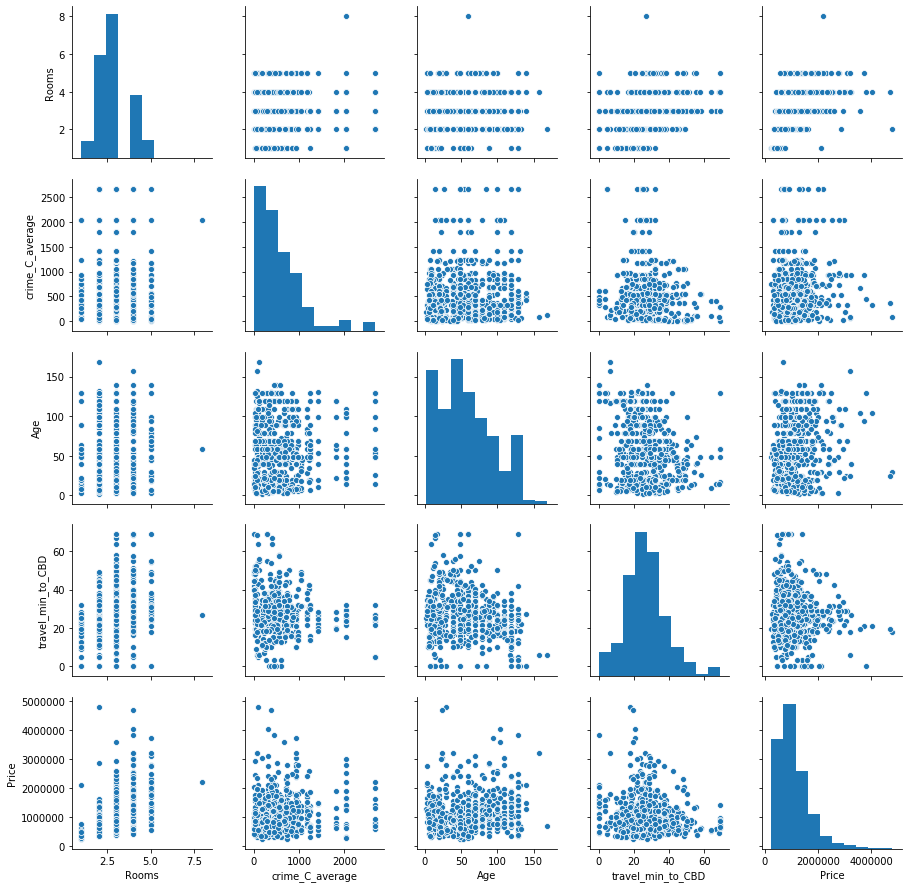

In [97]:
sns.pairplot(df)

We can observe that **crime_C_average** is **right skewed** therefore **log transformation** can be applied

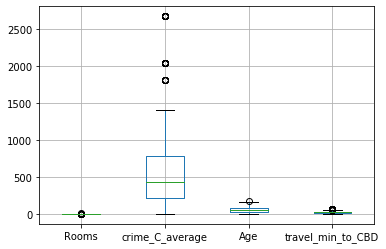

In [98]:
df.iloc[:,:-1].boxplot()

It can be observed that crime_C_average consists of outliers which may be the reason for its skewness

In [99]:
df.describe()

,Rooms,crime_C_average,Age,travel_min_to_CBD,Price
count,680.000000,680.000000,680.000000,680.000000,6.800000e+02
mean,2.900000,574.157843,56.719118,26.880483,1.082201e+06
std,0.953406,521.633927,36.493616,11.954090,6.266605e+05
min,1.000000,5.333333,2.000000,0.000000,2.400000e+05
25%,2.000000,222.666667,24.000000,19.214286,6.650000e+05
50%,3.000000,438.000000,52.500000,26.375000,9.100000e+05
75%,3.000000,779.666667,79.500000,33.153846,1.347000e+06
max,8.000000,2668.000000,169.000000,68.818182,4.800000e+06


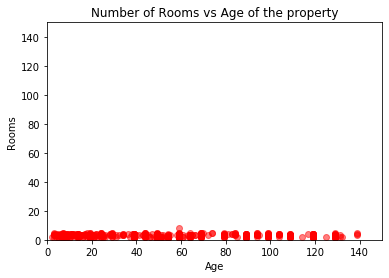

In [100]:
import matplotlib.pyplot as plt

colors = ("red")

# Plot
plt.scatter(df["Age"], df["Rooms"], c=colors, alpha=0.5)
plt.xlim(0,150)
plt.ylim(0,150)
plt.title('Number of Rooms vs Age of the property')
plt.xlabel('Age')
plt.ylabel('Rooms')
plt.show()

It can be observed that the data squished which indicates a problem in the data. The scale of variables **Rooms** and **Age** is different. The one with large scale i.e, Age dominates over the Rooms. Therefore, normalization is required.

## Data Normalization

We first try applying the minmax normalization technique to the data and observe the results.

In [101]:
minmax_scale = preprocessing.MinMaxScaler().fit(df.iloc[:,:-1])
df_minmax = minmax_scale.transform(df.iloc[:,:-1])
df_minmax[0:5]

array([[0.14285714, 0.52754131, 0.31137725, 0.35497264],
       [0.14285714, 0.04293941, 0.10179641, 0.19232264],
       [0.28571429, 0.        , 0.1257485 , 0.60836636],
       [0.42857143, 0.00250376, 0.04191617, 0.64935601],
       [0.28571429, 0.52754131, 0.58083832, 0.29062087]])

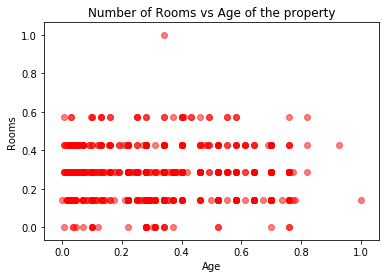

In [102]:
import matplotlib.pyplot as plt

colors = ("red")

# Plot
plt.scatter(df_minmax[:,2], df_minmax[:,0], c=colors, alpha=0.5)
# plt.xlim(0,150)
# plt.ylim(0,150)
plt.title('Number of Rooms vs Age of the property')
plt.xlabel('Age')
plt.ylabel('Rooms')
plt.show()

This normalization has resolved the squishing problem but we can observe that now the X-axis that is the **Age** is dominating the Y-axis **Rooms**. The X-axis lies in the range from 0.0-0.9 while the Y-axis lies in the range 0.0-0.6 

Therefore now we try appling Z-score normalization technique and observe the results.

In [103]:
std_scale = preprocessing.StandardScaler().fit(df.iloc[:,:-1])
df_std = std_scale.transform(df.iloc[:,:-1]) # an array not a df
df_std[0:5]

array([[-0.94467845,  1.6035334 , -0.07456425, -0.20526164],
       [-0.94467845, -0.87192513, -1.03434208, -1.14230634],
       [ 0.10496427, -1.09126956, -0.92465319,  1.2545677 ],
       [ 1.15460699, -1.0784798 , -1.30856432,  1.49071364],
       [ 0.10496427,  1.6035334 ,  1.15943581, -0.5759993 ]])

In [104]:
# put the scaled values alongside data... to view
df['room_scaled'] = df_std[:,0] # Rooms scaled
df['crime_C_average_scaled'] = df_std[:,1] # crime C average scaled
df['Age_scaled'] = df_std[:,2] # Age scaled
df['travel_min_to_CBD_scaled'] = df_std[:,3] # travel_min_to_CBD scaled
df.head()

,Rooms,crime_C_average,Age,travel_min_to_CBD,Price,room_scaled,crime_C_average_scaled,Age_scaled,travel_min_to_CBD_scaled
0,2,1410.000000,54.0,24.428571,391000.0,-0.944678,1.603533,-0.074564,-0.205262
1,2,119.666667,19.0,13.235294,790000.0,-0.944678,-0.871925,-1.034342,-1.142306
2,3,5.333333,23.0,41.866667,1150000.0,0.104964,-1.091270,-0.924653,1.254568
3,4,12.000000,9.0,44.687500,2025000.0,1.154607,-1.078480,-1.308564,1.490714
4,3,1410.000000,99.0,20.000000,1435000.0,0.104964,1.603533,1.159436,-0.575999


(<matplotlib.axes._subplots.AxesSubplot at 0x1a365d95f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a365d95f8>)

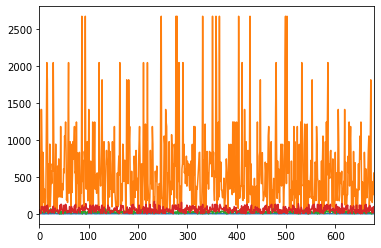

In [105]:
%matplotlib inline
df['Rooms'].plot(),df['crime_C_average'].plot(),df['travel_min_to_CBD'].plot(),df['Age'].plot()

The above graph represents the distribution of data before applying the normalization technique. It is evident that the data is not normally distributed which is a pre-requisite to apply linear regression for prediction.

The following graphs represent the effects after applying normalization

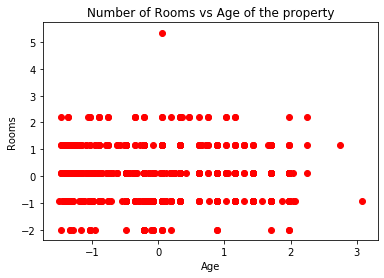

In [106]:
plt.scatter(df_std[:,2], df_std[:,0], color='red') # can't print: μ = 0, σ = 0
plt.title('Number of Rooms vs Age of the property')
plt.xlabel('Age')
plt.ylabel('Rooms')
plt.show()

In the Z-score normalization we can observe that the data is not biased and normally distributed between **Rooms** and **Age** that is between **(-2,2)**

We will observe the effect of Z-score normalization on the overall data

(<matplotlib.axes._subplots.AxesSubplot at 0x1a37005940>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a37005940>)

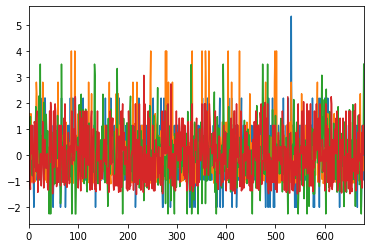

In [107]:
df['room_scaled'].plot(),df['crime_C_average_scaled'].plot(),df['travel_min_to_CBD_scaled'].plot(),df['Age_scaled'].plot()

It is evident from the above plot that after Z-score normalization the entire data is normalised and ready to used for predition.

## Data Reshaping and Transformations

In [108]:
df_original = df[["Rooms", "crime_C_average","Age","travel_min_to_CBD","Price"]]
df_original.head()

,Rooms,crime_C_average,Age,travel_min_to_CBD,Price
0,2,1410.000000,54.0,24.428571,391000.0
1,2,119.666667,19.0,13.235294,790000.0
2,3,5.333333,23.0,41.866667,1150000.0
3,4,12.000000,9.0,44.687500,2025000.0
4,3,1410.000000,99.0,20.000000,1435000.0


In [109]:
X_train, X_test, y_train, y_test = train_test_split(df_original.iloc[:,:-1],df['Price'],test_size=0.20, random_state=1)
clf = LinearRegression().fit(X_train, y_train)
pred=clf.predict(X_test) # Predicting labels for test data

print('R square :'+str(metrics.r2_score(y_test, pred)))
print('MSE :'+str(metrics.mean_squared_error(y_test, pred)))


R square :0.2738563917013077
MSE :231923462922.83673


Without applying reshaping or transformations on the columns the linear regression performs poorly where $R^2 = 0.28278$ and $MSE = 229072572674.5166$

As we observed skewness in the variable **crime_C_average**, we normalize the column by applying log transformation on it.

In [110]:
i = 0
for row in df_original.iterrows():
    if df_original['crime_C_average'][i] == 0:
        df_original['crime_C_average'].at[i] = 0
    else:
        df_original['crime_C_average'].at[i] = math.log(df_original["crime_C_average"][i])
    i += 1
    
df_original.head()

,Rooms,crime_C_average,Age,travel_min_to_CBD,Price
0,2,7.251345,54.0,24.428571,391000.0
1,2,4.784710,19.0,13.235294,790000.0
2,3,1.673976,23.0,41.866667,1150000.0
3,4,2.484907,9.0,44.687500,2025000.0
4,3,7.251345,99.0,20.000000,1435000.0


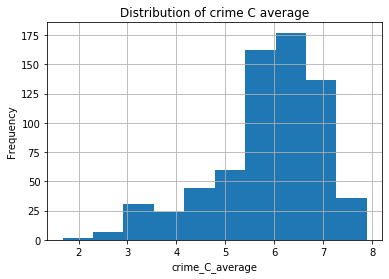

In [111]:
df_original["crime_C_average"].hist()
plt.title('Distribution of crime C average')
plt.xlabel('crime_C_average')
plt.ylabel('Frequency')
plt.show()

The above graph represents the distribution of crime_C_average after log transformation. It is observed that after transformation the data shows normal distribution.

We observed that Z-score normalization normalizes the entire data and makes it fit for linear regression. We will now apply linear regression on the Z-score normalized data and observe the results.

In [112]:
X_train, X_test, y_train, y_test = train_test_split(df_std,df['Price'],test_size=0.20, random_state=42)
clf = LinearRegression().fit(X_train, y_train)
pred=clf.predict(X_test) # Predicting labels for test data

print('R square :'+str(metrics.r2_score(y_test, pred)))
print('MSE :'+str(metrics.mean_squared_error(y_test, pred)))

R square :0.4872904631151824
MSE :165297169586.39038


It can be observed that after normalization there is an improvement in $R^2$ and the MSE value of the linear regression

## Summary

1. Parsed and integrated data from shapefiles.
2. Parsed and integrated data from gtfs files.
3. Parsed and integrated data from Excel file.
4. Parsed and integrated data from XML and HTML files.
5. The integrated data was reshaped and transformed to make them a normal distribution so that they 
   can be used for building models to make predictions.